In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

*Splitting the training data into training and validation*

In [46]:
train_data = tf.keras.utils.image_dataset_from_directory(
   'C:/Users/rhmnm/Desktop/CSC 462 models/Date_Train/train',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(400, 400),
  batch_size=52)

Found 1156 files belonging to 9 classes.
Using 1041 files for training.


In [47]:
valid_data = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/rhmnm/Desktop/CSC 462 models/Date_Train/train',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(400, 400),
  batch_size=52)

Found 1156 files belonging to 9 classes.
Using 115 files for validation.


*Calculating the number of Classes*

In [48]:
class_names = train_data.class_names
class_count = len(class_names)

In [49]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(925).prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

*Creating the Model*

In [50]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(400, 400, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

In [51]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 200, 200, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 100, 100, 64)     

*Training the Model*

In [52]:
history = model.fit(train_data,validation_data=valid_data,epochs=20)

Epoch 1/20
21/21 [==============================] - 33s 1s/step - loss: 4.2940 - accuracy: 0.1230 - val_loss: 2.2575 - val_accuracy: 0.0957
Epoch 2/20
21/21 [==============================] - 31s 1s/step - loss: 2.0477 - accuracy: 0.2469 - val_loss: 1.6857 - val_accuracy: 0.3826
Epoch 3/20
21/21 [==============================] - 30s 1s/step - loss: 1.2395 - accuracy: 0.5668 - val_loss: 1.4124 - val_accuracy: 0.5130
Epoch 4/20
21/21 [==============================] - 31s 1s/step - loss: 0.7573 - accuracy: 0.7666 - val_loss: 0.7181 - val_accuracy: 0.7478
Epoch 5/20
21/21 [==============================] - 32s 2s/step - loss: 0.4913 - accuracy: 0.8463 - val_loss: 0.5338 - val_accuracy: 0.8522
Epoch 6/20
21/21 [==============================] - 32s 2s/step - loss: 0.3855 - accuracy: 0.8732 - val_loss: 0.4325 - val_accuracy: 0.8957
Epoch 7/20
21/21 [==============================] - 31s 1s/step - loss: 0.2512 - accuracy: 0.9212 - val_loss: 0.3724 - val_accuracy: 0.9043
Epoch 8/20
21/21 [==

*Evaluating the Model on test data*

In [53]:
test_data = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/rhmnm/Desktop/CSC 462 models/Date_Test/test',
  validation_split=None,
  subset= None,
  seed=123,
  image_size=(400, 400),
  batch_size=52)

test_loss, test_acc = model.evaluate(test_data, verbose=0)
print('\nTest accuracy:', test_acc)

Found 502 files belonging to 9 classes.

Test accuracy: 0.9103585481643677


*Visualizing Training and Validation Accuracy and Loss*

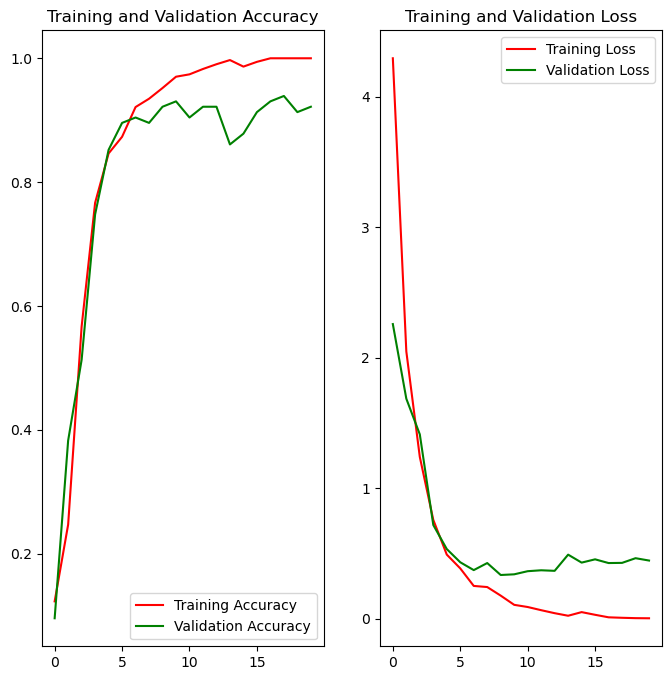

In [54]:
acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
erange = range(history.epoch[-1]+1)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(erange, acc, label='Training Accuracy', color='Red')
plt.plot(erange, valid_acc, label='Validation Accuracy', color='Green')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(erange, loss, label='Training Loss', color='Red')
plt.plot(erange, val_loss, label='Validation Loss', color='Green')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

*Structring the Classification Report*

In [55]:
from sklearn.datasets import load_files
from keras.preprocessing import image
from keras.utils import np_utils
import numpy as np
data = load_files('C:/Users/rhmnm/Desktop/CSC 462 models/Date_Test/test')
target_names = data['target_names']
files = np.array(data['filenames'])
targets =  np_utils.to_categorical(np.array(data['target']))

In [56]:
import keras.utils as image
def from_path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(400, 400))
    arr_im = image.img_to_array(img) 
    return np.expand_dims(arr_im, axis=0)

x_test = np.vstack([from_path_to_tensor(img_path) for img_path in files])

In [57]:
y_prob_predic = model.predict(x_test) # returns an array of predicted probabilities for each class
y_classes_predic = y_prob_predic.argmax(axis=-1)

16/16 [==============================] - 3s 173ms/step


In [58]:
y_testLabels = []
y_predicClass = []
for i in targets: 
    y_testLabels.append(target_names[np.argwhere(i)[0][0]])
    
y_predicClass = [  target_names[i]  for i in y_classes_predic]

*The Classification report*

In [59]:
from sklearn.metrics import classification_report

# Convert the predicted class probabilities to class labels
y_pred_classes = np.argmax(y_prob_predic, axis=1)

# Convert the ground truth labels to class labels
y_true_classes = np.argmax(targets, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

        Ajwa       1.00      1.00      1.00        53
      Galaxy       0.86      0.89      0.88        57
     Mejdool       0.85      0.85      0.85        41
     Meneifi       0.81      0.93      0.87        70
   NabtatAli       0.90      0.87      0.89        54
       Rutab       0.95      0.95      0.95        44
     Shaishe       1.00      0.98      0.99        52
      Sokari       0.94      0.90      0.92        80
      Sugaey       0.91      0.80      0.85        51

    accuracy                           0.91       502
   macro avg       0.92      0.91      0.91       502
weighted avg       0.91      0.91      0.91       502



*Visualising the Confusion Matrix*

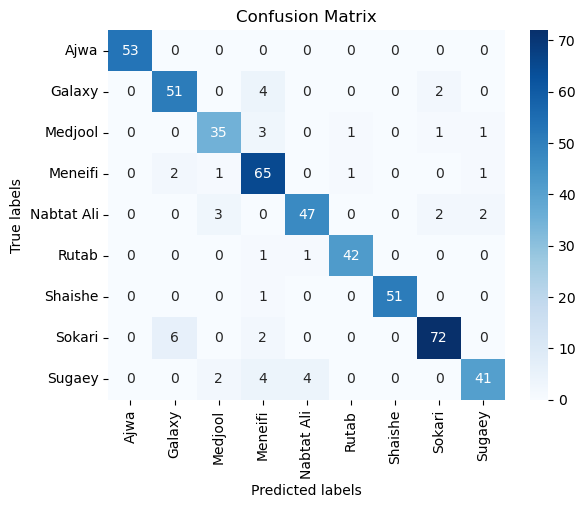

In [60]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
cm = confusion_matrix(y_true_classes, y_pred_classes)
classes_name = ['Ajwa', 'Galaxy', 'Medjool', 'Meneifi', 'Nabtat Ali', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes_name, yticklabels=classes_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

*Dataset samples count per label charts for both training and test sets*

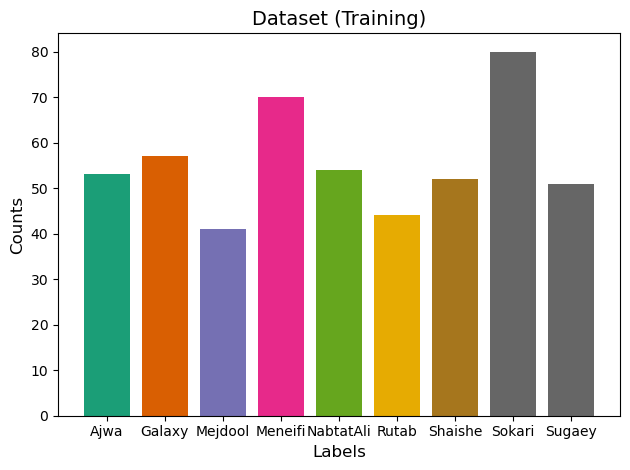

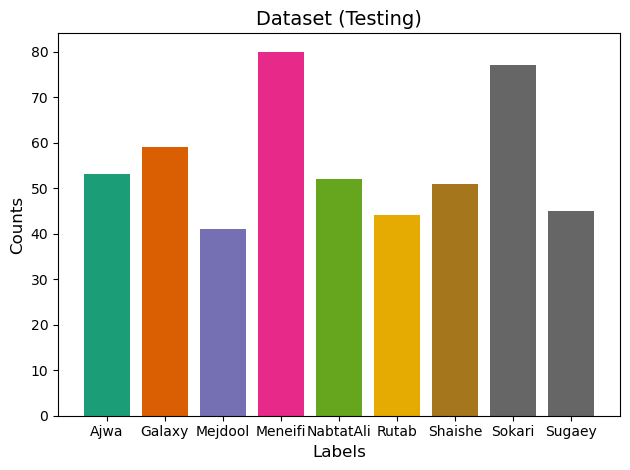

In [61]:
# Get the count of samples for each label in the training set
train_samples_counts = np.unique(y_true_classes, return_counts=True)[1]

# Define a color map for the classes
color_map = plt.get_cmap('Dark2')
colors = color_map(np.linspace(0, 1, len(target_names)))

# Plot the number of samples for each label in the training set
for i, color in enumerate(colors):
    plt.bar(target_names[i], train_samples_counts[i], color=color, alpha=1)

# Add labels and title to the plot
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Dataset (Training)', fontsize=14)
plt.tight_layout()
plt.show()

# Get the count of samples for each label in the test set
test_samples_counts = np.unique(y_pred_classes, return_counts=True)[1]

# Plot the number of samples for each label in the test set
for i, color in enumerate(colors):
    plt.bar(target_names[i], test_samples_counts[i], color=color, alpha=1)

# Add labels and title to the plot
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Dataset (Testing)', fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
img = tf.keras.utils.load_img(
    "C:/Users/rhmnm/Desktop/Medjool.jpeg", target_size=(400, 400)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to Meneifi with a 99.81 percent confidence.


In [63]:
img = tf.keras.utils.load_img(
    "C:/Users/rhmnm/Desktop/Sokari.jpeg", target_size=(400, 400)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Rutab with a 99.55 percent confidence.


In [64]:
img = tf.keras.utils.load_img(
    "C:/Users/rhmnm/Desktop/Rutab.jpeg", target_size=(400, 400)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Rutab with a 100.00 percent confidence.
